In [3]:
import pandas as pd

## Cas d'un département où l'immobilier est peu cher, avec quelques villes mais assez peu urbanisé : le Finistère

In [4]:
data29 = pd.read_csv('https://files.data.gouv.fr/geo-dvf/latest/csv/2020/departements/29.csv.gz')
data29.head()

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,2020-218356,2020-01-03,1,Vente,650000.0,14.0,NaN,HAM DES HAUTS DU GUERN,A428,29940.0,29057,La Forêt-Fouesnant,29,NaN,NaN,29057000AS0119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,218.0,5.0,S,sols,NaN,NaN,500.0,-3.954603,47.906849
1,2020-218356,2020-01-03,1,Vente,650000.0,14.0,NaN,HAM DES HAUTS DU GUERN,A428,29940.0,29057,La Forêt-Fouesnant,29,NaN,NaN,29057000AS0119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,218.0,5.0,AG,terrains d'agrément,NaN,NaN,1117.0,-3.954603,47.906849
2,2020-218357,2020-01-04,1,Vente,69700.0,259.0,A,LANNOAN,B062,29770.0,29028,Cléden-Cap-Sizun,29,NaN,NaN,29028000ZP0163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,54.0,2.0,S,sols,NaN,NaN,515.0,-4.656430,48.046952
3,2020-218358,2020-01-02,1,Vente,250000.0,17.0,NaN,RUE DE KROAS PRENN,0450,29940.0,29057,La Forêt-Fouesnant,29,NaN,NaN,29057000AO0058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,120.0,3.0,S,sols,NaN,NaN,362.0,-3.984213,47.907859
4,2020-218359,2020-01-04,1,Vente,54900.0,27.0,NaN,RTE DE PONT L ABBE,5220,29000.0,29232,Quimper,29,NaN,NaN,29232000CS0014,NaN,NaN,28.0,NaN,47.0,68.16,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,70.0,3.0,NaN,NaN,NaN,NaN,NaN,-4.119570,47.989019


### Liste des colonnes 

In [5]:
data29.columns

Index(['id_mutation', 'date_mutation', 'numero_disposition', 'nature_mutation',
       'valeur_fonciere', 'adresse_numero', 'adresse_suffixe',
       'adresse_nom_voie', 'adresse_code_voie', 'code_postal', 'code_commune',
       'nom_commune', 'code_departement', 'ancien_code_commune',
       'ancien_nom_commune', 'id_parcelle', 'ancien_id_parcelle',
       'numero_volume', 'lot1_numero', 'lot1_surface_carrez', 'lot2_numero',
       'lot2_surface_carrez', 'lot3_numero', 'lot3_surface_carrez',
       'lot4_numero', 'lot4_surface_carrez', 'lot5_numero',
       'lot5_surface_carrez', 'nombre_lots', 'code_type_local', 'type_local',
       'surface_reelle_bati', 'nombre_pieces_principales',
       'code_nature_culture', 'nature_culture', 'code_nature_culture_speciale',
       'nature_culture_speciale', 'surface_terrain', 'longitude', 'latitude'],
      dtype='object')

In [6]:
data29.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15760 entries, 0 to 15759
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_mutation                   15760 non-null  object 
 1   date_mutation                 15760 non-null  object 
 2   numero_disposition            15760 non-null  int64  
 3   nature_mutation               15760 non-null  object 
 4   valeur_fonciere               15721 non-null  float64
 5   adresse_numero                8994 non-null   float64
 6   adresse_suffixe               827 non-null    object 
 7   adresse_nom_voie              15526 non-null  object 
 8   adresse_code_voie             15527 non-null  object 
 9   code_postal                   15527 non-null  float64
 10  code_commune                  15760 non-null  int64  
 11  nom_commune                   15760 non-null  object 
 12  code_departement              15760 non-null  int64  
 13  a

### nombre de mutations

In [7]:
data29.shape

(15760, 40)

### Nombre de communes

In [8]:
len(data29['nom_commune'].unique())

265

Type de mutations

In [9]:
data29['nature_mutation'].unique()

array(['Vente', 'Vente terrain à bâtir',
       "Vente en l'état futur d'achèvement", 'Echange', 'Adjudication'],
      dtype=object)

### Nombre de ventes

In [10]:
data29.groupby('nature_mutation')['id_mutation'].count()

nature_mutation
Adjudication                             15
Echange                                  30
Vente                                 15166
Vente en l'état futur d'achèvement      506
Vente terrain à bâtir                    43
Name: id_mutation, dtype: int64

In [11]:
data29['type_local'].unique()

array(['Maison', 'Appartement', 'Dépendance',
       'Local industriel. commercial ou assimilé', nan], dtype=object)

### Nombre de maison et appartement

In [12]:
data29[(data29['type_local']=='Appartement') | (data29['type_local']=='Maison')].shape

(6424, 40)

Nombre de valeurs non renseignées pour maison ou appartement

In [13]:
data29[data29['type_local'].isnull()].shape

(7662, 40)

Comptage différents type de locaux

In [14]:
data29.groupby('type_local')['id_mutation'].count()

type_local
Appartement                                 2126
Dépendance                                  1080
Local industriel. commercial ou assimilé     594
Maison                                      4298
Name: id_mutation, dtype: int64

In [15]:
data29['valeur_fonciere'].describe()

count    1.572100e+04
mean     2.427487e+05
std      7.956478e+05
min      1.000000e+00
25%      5.700000e+04
50%      1.200000e+05
75%      2.050000e+05
max      7.547069e+06
Name: valeur_fonciere, dtype: float64

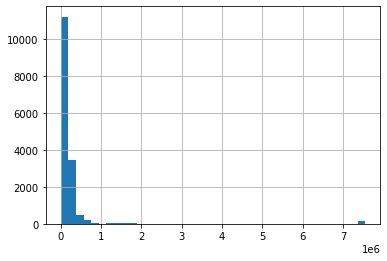

In [16]:
data29['valeur_fonciere'].hist(bins=40);

In [17]:
appart_maison29 = data29[(data29['type_local']=='Appartement') | (data29['type_local']=='Maison')]
appart_maison29 = data29[data29['nature_mutation']=='Vente']
appart_maison29['valeur_fonciere'].describe()

count    1.512700e+04
mean     1.596192e+05
std      2.020431e+05
min      1.000000e+00
25%      5.582810e+04
50%      1.170000e+05
75%      2.000000e+05
max      4.656278e+06
Name: valeur_fonciere, dtype: float64

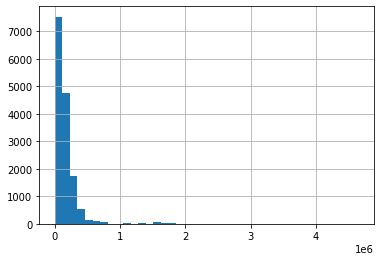

In [18]:
appart_maison29['valeur_fonciere'].hist(bins=40);

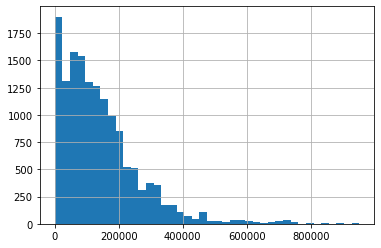

In [19]:
appart_maison29[appart_maison29['valeur_fonciere'] < 1000000]['valeur_fonciere'].hist(bins=40);

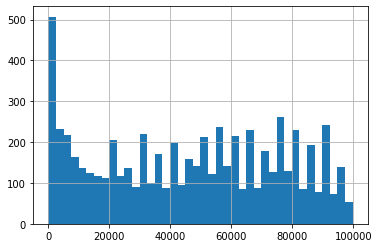

In [20]:
appart_maison29[appart_maison29['valeur_fonciere'] < 100000]['valeur_fonciere'].hist(bins=40);

## Cas d'un département dynamique, et où l'immobilier est cher, fortement urbanisé : les BdR

In [21]:
data13 = pd.read_csv('https://files.data.gouv.fr/geo-dvf/latest/csv/2020/departements/13.csv.gz')
data13.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,2020-94656,2020-01-03,1,Vente en l'état futur d'achèvement,189000.0,NaN,NaN,CHE DU FOUR DE BUZE,3658,13014.0,13214,Marseille 14e Arrondissement,13,NaN,NaN,132148960B0246,NaN,NaN,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.399821,43.343794
1,2020-94656,2020-01-03,1,Vente en l'état futur d'achèvement,189000.0,NaN,NaN,CHE DU FOUR DE BUZE,3658,13014.0,13214,Marseille 14e Arrondissement,13,NaN,NaN,132148960B0246,NaN,NaN,109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.399821,43.343794
2,2020-94657,2020-01-06,1,Vente,560000.0,7.0,NaN,RUE PYTHEAS,7651,13001.0,13201,Marseille 1er Arrondissement,13,NaN,NaN,132018040B0369,NaN,NaN,5,185.85,6.0,185.85,7.0,185.85,NaN,NaN,NaN,NaN,3,4.0,Local industriel. commercial ou assimilé,180.0,0.0,NaN,NaN,NaN,NaN,NaN,5.375018,43.294115
3,2020-94658,2020-01-07,1,Vente,2583100.0,2.0,NaN,RUE DE BEAUSSET,0945,13001.0,13201,Marseille 1er Arrondissement,13,NaN,NaN,132018010E0048,NaN,NaN,46,9.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4.0,Local industriel. commercial ou assimilé,10.0,0.0,NaN,NaN,NaN,NaN,NaN,5.374365,43.296557
4,2020-94658,2020-01-07,1,Vente,2583100.0,2.0,NaN,RUE DE BEAUSSET,0945,13001.0,13201,Marseille 1er Arrondissement,13,NaN,NaN,132018010E0048,NaN,NaN,41,14.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4.0,Local industriel. commercial ou assimilé,12.0,0.0,NaN,NaN,NaN,NaN,NaN,5.374365,43.296557


In [22]:
data13.shape

(49004, 40)

In [23]:
data13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49004 entries, 0 to 49003
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_mutation                   49004 non-null  object 
 1   date_mutation                 49004 non-null  object 
 2   numero_disposition            49004 non-null  int64  
 3   nature_mutation               49004 non-null  object 
 4   valeur_fonciere               47323 non-null  float64
 5   adresse_numero                36722 non-null  float64
 6   adresse_suffixe               2505 non-null   object 
 7   adresse_nom_voie              47461 non-null  object 
 8   adresse_code_voie             47461 non-null  object 
 9   code_postal                   47461 non-null  float64
 10  code_commune                  49004 non-null  int64  
 11  nom_commune                   49004 non-null  object 
 12  code_departement              49004 non-null  int64  
 13  a

## Voyons de plus près le pb de Dtype que pose la ligne 18 (qui devrait être un entier)

In [24]:
data13.iloc[:,18:19].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49004 entries, 0 to 49003
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   lot1_numero  30232 non-null  object
dtypes: object(1)
memory usage: 383.0+ KB


In [25]:
col18_uni = data13['lot1_numero'].unique()

In [26]:
len(col18_uni)

2420

In [27]:
type(col18_uni[0])

str

In [28]:
type(col18_uni[-1])

float

On a au moins des str et des float mélangés...

Cela arrivera peut-être à d'autres colonnes. Une fois qu'on aura choisi les colonnes qu'on conservera il faudra s'assurer de les transformer au bon dtype.

Vérification pour la date au moins :

In [29]:
type(data13['date_mutation'][0])

str

Il faudra les transformer en datetime

### Nombre de communes

In [30]:
len(data13['nom_commune'].unique())

134

### Nombre de ventes

In [31]:
data13.groupby('nature_mutation')['id_mutation'].count()

nature_mutation
Adjudication                             39
Echange                                 181
Expropriation                             1
Vente                                 40297
Vente en l'état futur d'achèvement     8447
Vente terrain à bâtir                    39
Name: id_mutation, dtype: int64

### Nombre de maisons et appartements

In [32]:
data13[(data13['type_local']=='Appartement') | (data13['type_local']=='Maison')].shape

(22044, 40)

In [33]:
data13['valeur_fonciere'].describe()

count    4.732300e+04
mean     7.527420e+05
std      2.694066e+06
min      1.000000e+00
25%      1.400000e+05
50%      2.347000e+05
75%      3.900000e+05
max      5.790000e+07
Name: valeur_fonciere, dtype: float64

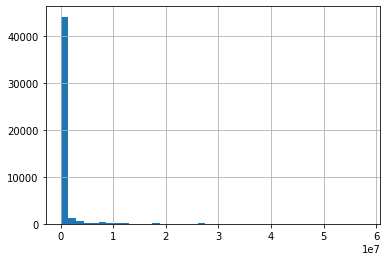

In [34]:
data13['valeur_fonciere'].hist(bins=40);

In [35]:
appart_maison13 = data13[(data13['type_local']=='Appartement') | (data13['type_local']=='Maison')]
appart_maison13 = data13[data13['nature_mutation']=='Vente']
appart_maison13['valeur_fonciere'].describe()

count    3.861600e+04
mean     4.117999e+05
std      1.156622e+06
min      1.000000e+00
25%      1.250000e+05
50%      2.250000e+05
75%      3.850000e+05
max      5.790000e+07
Name: valeur_fonciere, dtype: float64

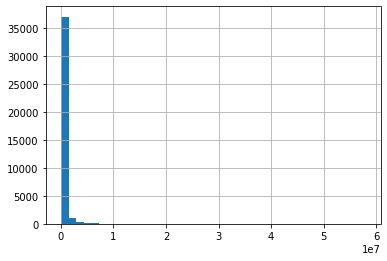

In [36]:
appart_maison13['valeur_fonciere'].hist(bins=40);

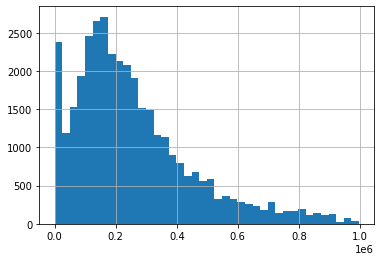

In [37]:
appart_maison13[appart_maison13['valeur_fonciere'] < 1000000]['valeur_fonciere'].hist(bins=40);

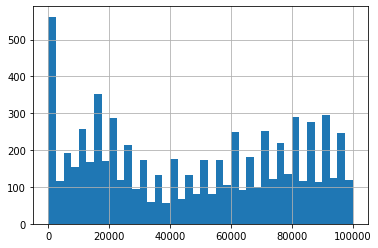

In [38]:
appart_maison13[appart_maison13['valeur_fonciere'] < 100000]['valeur_fonciere'].hist(bins=40);